<h2 style = 'color:green'><center>Heart_Disease_and_Stroke_Classification</center></h2>

__Prepared By: VENKATESH_MUNGI__

__Email: venkateshmungi1247@gmail.com__

<h2 style = 'color:blue'><left>Background:</left></h2>

In my Machine_Learning Project I used classification algorithms to resolve the topic Heart Disease and Stroke, where I tried to predict the possibility of a stroke in a person with certain conditions based on several factors including: age, certain diseases (hypertension, heart disease), smoking, etc.

<h3 style = 'color:BLUEVIOLET'><LEFT>Exploratory Data Analysis</LEFT></h3>

In [1]:
# importing required libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# loading the dataset

df = pd.read_csv(r"C:\PYTHON\PANDAS\strokeprediction.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
# Copying the Dataset

hsd = df.copy()
hsd.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


In [4]:
# Deleting Unwanted Columns\Features

del hsd["id"]

In [5]:
# Getting shape of the data

hsd.shape

(43400, 11)

In [6]:
# Getting size of the data

hsd.size

477400

In [7]:
# Getting metadata information of the data

hsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


<h3 style = "color:BlueViolet"><left><i>Finding the "Statistics" of the Continuous Features<i></left></h3>

In [8]:
# Knowing the Statistics of the data

hsd.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [9]:
# to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Getting CentralTendency Of data

print("MEAN: \n\n",hsd.mean(),"\n\nMEDIAN: \n\n",hsd.median(),"\n\nMODE: \n\n",hsd.mode().sum(),end = " ")

MEAN: 

 age                   42.217894
hypertension           0.093571
heart_disease          0.047512
avg_glucose_level    104.482750
bmi                   28.605038
stroke                 0.018041
dtype: float64 

MEDIAN: 

 age                  44.00
hypertension          0.00
heart_disease         0.00
avg_glucose_level    91.58
bmi                  27.70
stroke                0.00
dtype: float64 

MODE: 

 gender                     Female
age                          51.0
hypertension                    0
heart_disease                   0
ever_married                  Yes
work_type                 Private
Residence_type              Urban
avg_glucose_level           82.71
bmi                          27.7
smoking_status       never smoked
stroke                          0
dtype: object 

- If the mean is greater than the mode, the distribution is positively skewed. 
- If the mean is less than the mode, the distribution is negatively skewed. 
- If the mean is greater than the median, the distribution is positively skewed. 
- If the mean is less than the median, the distribution is negatively skewed.

In [11]:
# Knowing Standard Deviation, Variance, Kurtosis of the data

from scipy.stats import skew         # importing skew module to get the skewness of the Continuous Data
from scipy.stats import kurtosis     # importing kutosis module to get the kurtosis of the Continuous Data

print("Standard Deviation: \n\n",hsd.std(),"\n\nVariance: \n\n",hsd.var(),"\n\nSkweness: \n\n",hsd.skew(),"\n\nKurtosis: \n\n",hsd.kurtosis(),end = " ")

Standard Deviation: 

 age                  22.519649
hypertension          0.291235
heart_disease         0.212733
avg_glucose_level    43.111751
bmi                   7.770020
stroke                0.133103
dtype: float64 

Variance: 

 age                   507.134577
hypertension            0.084818
heart_disease           0.045255
avg_glucose_level    1858.623070
bmi                    60.373219
stroke                  0.017716
dtype: float64 

Skweness: 

 age                 -0.102497
hypertension         2.791199
heart_disease        4.254252
avg_glucose_level    1.675405
bmi                  0.898728
stroke               7.242226
dtype: float64 

Kurtosis: 

 age                  -1.000190
hypertension          5.791059
heart_disease        16.099401
avg_glucose_level     2.181226
bmi                   1.988821
stroke               50.452165
dtype: float64 

###### Standard deviation (or σ)

A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. 

* Low standard deviation means data are clustered around the mean.

* High standard deviation indicates data are more spread out. 

* A standard deviation close to zero indicates that data points are close to the mean.

* Whereas a high or low standard deviation indicates data points are respectively above or below the mean. 

Standard deviation is the square root of variance. It is sometimes more useful since taking the square root removes the units from the analysis. This allows for direct comparisons between different things that may have different units or different magnitudes.

###### Variance 

The variance is a measure of variability. It is calculated by taking the average of squared deviations from the mean. Variance tells you the degree of spread in your data set. The more spread the data, the larger the variance is in relation to the mean.

* If the value of the variance is 0, it indicates that all the data points in the data set are of equal value.

* A large variance implies that the data is more vastly spread out from the mean.

* Similarly, a small variance shows that the values of the data points are closer together and are clustered around the mean.

###### Skewness

In statistics, skewness is a degree of asymmetry observed in a probability distribution that deviates from the symmetrical normal distribution (bell curve) in a given set of data.

* Positively Skewed Distribution is a type of distribution where the mean, median, and mode of the distribution are positive rather than negative or zero. 

  In positively skewed, the mean of the data is greater than the median (a large number of data-pushed on the right-hand side). In other words, the results are bent towards the lower side. The mean will be more than the median as the median is the middle value and mode is always the highest value

  The extreme positive skewness is not desirable for distribution, as a high level of skewness can cause misleading results. The data transformation tools are helping to make the skewed data closer to a normal distribution. For positively skewed distributions, the famous transformation is the log transformation. The log transformation proposes the calculations of the natural logarithm for each value in the dataset.
  
  
* A negatively skewed distribution is the straight reverse of a positively skewed distribution. In statistics, negatively skewed distribution refers to the distribution model where more values are plots on the right side of the graph, and the tail of the distribution is spreading on the left side.

  In negatively skewed, the mean of the data is less than the median (a large number of data-pushed on the left-hand side). Negatively Skewed Distribution is a type of distribution where the mean, median, and mode of the distribution are negative rather than positive or zero.
  
  
###### Kurtosis 

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

The histogram is an effective graphical technique for showing both the skewness and kurtosis of data set. 

<h3 style = "color:BlueViolet"><left><i>Finding Minimum, Maximum, Range From the Dataset<i></left></h3>

In [12]:
# Getting min values 
hsd.min()

gender                 Female
age                      0.08
hypertension                0
heart_disease               0
ever_married               No
work_type            Govt_job
Residence_type          Rural
avg_glucose_level        55.0
bmi                      10.1
stroke                      0
dtype: object

In [13]:
# Getting max values

hsd.max()

gender                  Other
age                      82.0
hypertension                1
heart_disease               1
ever_married              Yes
work_type            children
Residence_type          Urban
avg_glucose_level      291.05
bmi                      97.6
stroke                      1
dtype: object

- We can't get range from String objects. So, now we will seperate Nemuric features to get range of our data

In [14]:
# Seperating out the Numeric Features to get Range of our data

hsd1 = hsd[["age","avg_glucose_level","hypertension","heart_disease","bmi"]]

In [15]:
range_ = hsd1.max() - hsd1.min()
range_

age                   81.92
avg_glucose_level    236.05
hypertension           1.00
heart_disease          1.00
bmi                   87.50
dtype: float64

- Range, which is the difference between the largest and smallest value in the data set, describes how well the central tendency represents the data. If the range is large, the central tendency is not as representative of the data as it would be if the range was small.

<h3 style = "color:BlueViolet"><left><i>Value_Count on Categorical Features<i></left></h3>

In [16]:
# To konw the data types of the data
hsd.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [17]:
hsd.gender.value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [18]:
hsd.ever_married.value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

In [19]:
hsd.work_type.value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [20]:
hsd.Residence_type.value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

In [21]:
hsd.smoking_status.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

<h3 style = "color:blueviolet"><left><i>Checking for Missing Values<i></left></h3>

In [22]:
hsd.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

- From above data it is clear that we have null values in  Features: "BMI" and "Smoking_Status".
    - I want to plot Outliers for BMI, becauce it is continuous data. If "BMI" has outliers i want to go to fill with median, otherwise, if there is no outliers i will fill null values with mean for "BMI"
    - For the feature "Smoking_Status i want to use mode to fill the null values, since it is categorical data.

<h3 style = "color:BlueViolet"><left><i>Checking For Outliers in BMI feature<i></left></h3>

<AxesSubplot:xlabel='bmi'>

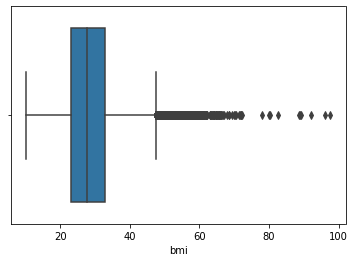

In [23]:
sns.boxplot(hsd["bmi"])

<h3 style = "color:BlueViolet"><left><i>Filling Missed Continuous and Categorical Values<i></left></h3>

- Since, we have outliers in "BMI", i want to fill null values with median for "bmi"

In [24]:
hsd['bmi'] = hsd['bmi'].fillna(hsd['bmi'].median())

In [25]:
hsd['smoking_status'] = hsd['smoking_status'].fillna(hsd['smoking_status'].mode()[0])

In [26]:
hsd.isnull().values.any()

False

In [27]:
hsd.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<h3 style = "color:BlueViolet"><left><i>Let’s see how does Gender affects and Gender wise comparison of stroke rate.<i></left></h3>

In [28]:
print('Unique values\n',hsd['gender'].unique())

Unique values
 ['Male' 'Female' 'Other']


In [29]:
print('Value Counts\n',hsd['gender'].value_counts())

Value Counts
 Female    25665
Male      17724
Other        11
Name: gender, dtype: int64


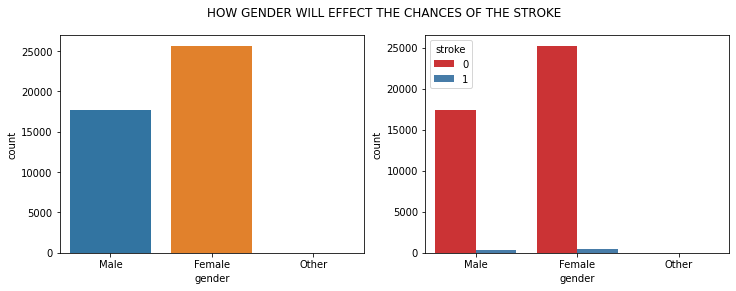

In [30]:
plt.figure(figsize = (12,4))
plt.suptitle('HOW GENDER WILL EFFECT THE CHANCES OF THE STROKE')
plt.subplot(1,2,1)
sns.countplot(data = hsd, x = "gender")
plt.subplot(1,2,2)
sns.countplot(data = hsd, x = 'gender', hue = 'stroke', palette="Set1")
plt.show()

###### Observation : 

- From the above graph it is cleard that the dataset is imbalanced and there ids not much difference between stroke ratew corncerning gender

<h3 style = "color:BlueViolet"><left><i>Let’s see how does Age affects the stroke rate.<i></left></h3>

In [31]:
print('Unique values\n',hsd['age'].nunique())

Unique values
 104


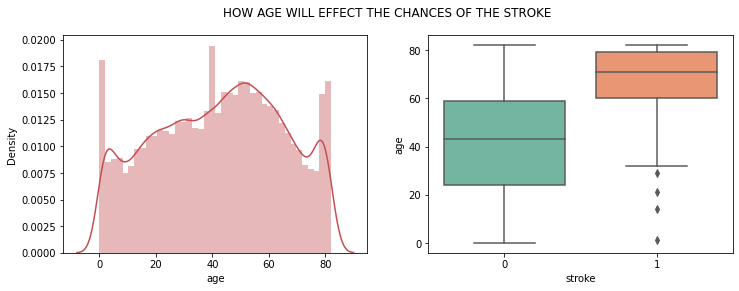

In [32]:
plt.figure(figsize = (12,4))
plt.suptitle('HOW AGE WILL EFFECT THE CHANCES OF THE STROKE')
plt.subplot(1,2,1)
sns.set_color_codes()
sns.distplot(hsd["age"], color = 'r')
plt.subplot(1,2,2)
sns.boxplot(data = hsd, x = 'stroke', y = 'age', palette="Set2")
plt.show()

###### Observation:

People aged more than 60 years tend to have a stroke. Some outliers can be seen as people below age 20 are having a stroke it might be possible that it’s valid data as stroke also depends on our eating and living habits. Another observation is people not having strokes also consist of people age > 60 years.

<h3 style = "color:BlueViolet"><left><i>Let’s see how does Hypertension affects the stroke rate.<i></left></h3>

- Hypertension is a condition when a person has high blood pressure. Hypertension might result in a stroke. 

In [33]:
hsd['age'].nunique()

104

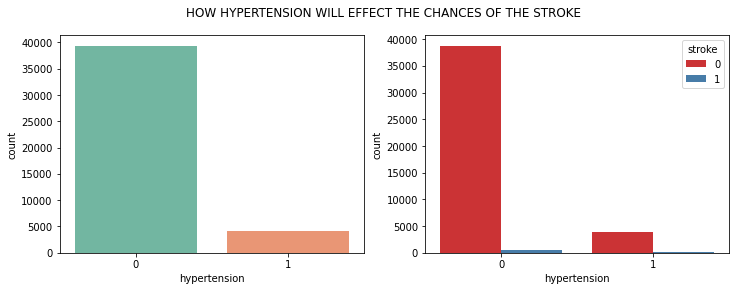

In [34]:
plt.figure(figsize = (12,4))
plt.suptitle('HOW HYPERTENSION WILL EFFECT THE CHANCES OF THE STROKE')
plt.subplot(1,2,1)
sns.countplot(data = hsd, x = "hypertension",palette="Set2")
plt.subplot(1,2,2)
sns.countplot(data = hsd, x = 'hypertension', hue = 'stroke',palette="Set1")
plt.show()

- From the above graph it is clear that hypertension is rare in young people and common in aged people. Hypertension can cause a stroke. Based on our data picture is not that clear for hypertension. It has quite little data on patients having hypertension.

<h3 style = "color:BlueViolet"><left><i>Let’s see how does Heart Disease affects the stroke rate.<i></left></h3>

- People having heart disease tends to have a higher risk of having a stroke if proper care is not taken.

In [35]:
print('Unique Value\n',hsd['heart_disease'].unique())
print('Value Counts\n',hsd['heart_disease'].value_counts())

Unique Value
 [0 1]
Value Counts
 0    41338
1     2062
Name: heart_disease, dtype: int64


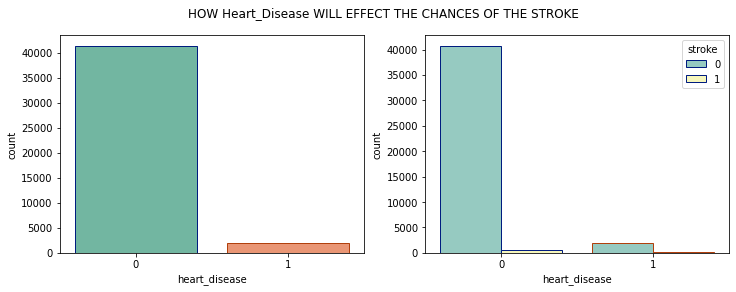

In [36]:
plt.figure(figsize = (12,4))
plt.suptitle('HOW Heart_Disease WILL EFFECT THE CHANCES OF THE STROKE')
plt.subplot(1,2,1)
sns.countplot(data = hsd, x = "heart_disease", palette="Set2", edgecolor=sns.color_palette("dark", 10))
plt.subplot(1,2,2)
sns.countplot(data = hsd, x = 'heart_disease', hue = 'stroke', palette="Set3", edgecolor=sns.color_palette("dark", 10))
plt.show()

###### Observation:

Because of the imbalanced dataset, it’s a little bit difficult to get an idea. But as per this plot, we can say that heart disease is not affecting Stroke.

<h3 style = "color:BlueViolet"><left><i>Let’s see how does Ever Mrried attribute affects the stroke rate.<i></left></h3>

- This attribute will tell us whether or not the patient was ever married. Let’s see how will it affect the chances of having a stroke.

In [37]:
print('Unique Values\n',hsd['ever_married'].unique())
print('Value Counts\n',hsd['ever_married'].value_counts())

Unique Values
 ['No' 'Yes']
Value Counts
 Yes    27938
No     15462
Name: ever_married, dtype: int64


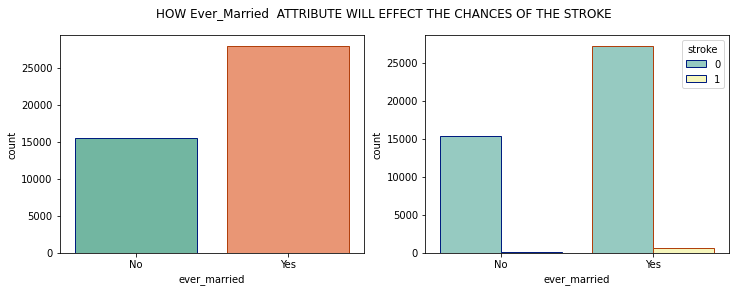

In [38]:
plt.figure(figsize = (12,4))
plt.suptitle('HOW Ever_Married  ATTRIBUTE WILL EFFECT THE CHANCES OF THE STROKE')
plt.subplot(1,2,1)
sns.countplot(data = hsd, x = "ever_married", palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.subplot(1,2,2)
sns.countplot(data = hsd, x = 'ever_married', hue = 'stroke', palette="Set3", edgecolor=sns.color_palette("dark", 10))
plt.show()

###### Observation:

People who are married have a higher stroke rate.

<h3 style = "color:BlueViolet"><left><i>Let’s see how does Work Type affects the stroke rate.<i></left></h3>

- This attribute contains data about what kind of work does the patient. Different kinds of work have different kinds of problems and challenges which can be the possible reason for excitement, thrill, stress, etc. Stress is never good for health, let’s see how this variable can affect the chances of having a stroke.

In [39]:
print('Unique Value\n',hsd['work_type'].unique())
print('Value Counts\n',hsd['work_type'].value_counts())

Unique Value
 ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Value Counts
 Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64


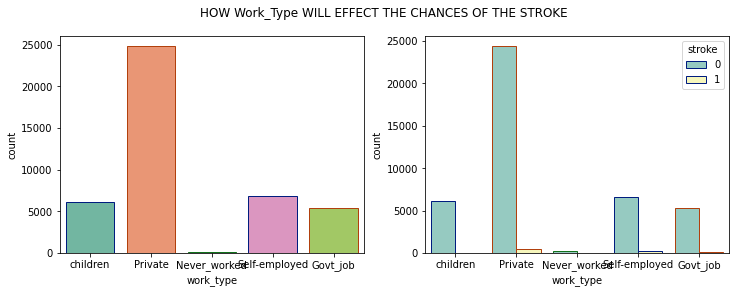

In [40]:
plt.figure(figsize = (12,4))
plt.suptitle('HOW Work_Type WILL EFFECT THE CHANCES OF THE STROKE')
plt.subplot(1,2,1)
sns.countplot(data = hsd, x = "work_type", palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.subplot(1,2,2)
sns.countplot(data = hsd, x = 'work_type', hue = 'stroke', palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

###### Observation:

People working in the Private sector have a higher risk of getting a stroke. And people who have never worked have a very less stroke rate.

<h3 style = "color:BlueViolet"><left><i>Let’s see how does Residence Type affects the stroke rate.<i></left></h3>

- This attribute tells us whether what kind of residence the patient is. It can be Urban or Rural.

In [41]:
print('Unique Values\n',hsd['Residence_type'].unique())
print("Value Counts\n",hsd['Residence_type'].value_counts())

Unique Values
 ['Rural' 'Urban']
Value Counts
 Urban    21756
Rural    21644
Name: Residence_type, dtype: int64


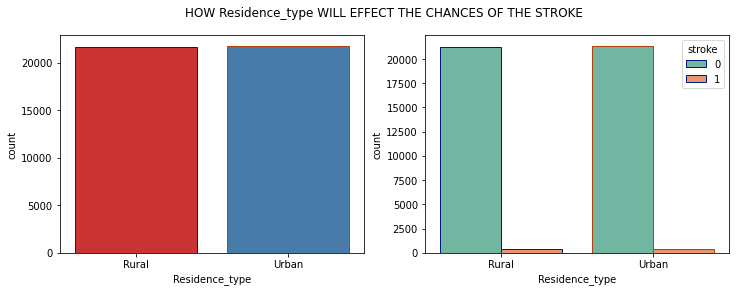

In [42]:
plt.figure(figsize = (12,4))
plt.suptitle('HOW Residence_type WILL EFFECT THE CHANCES OF THE STROKE')
plt.subplot(1,2,1)
sns.countplot(data = hsd, x = "Residence_type",palette="Set1",edgecolor=sns.color_palette("dark", 3) )
plt.subplot(1,2,2)
sns.countplot(data = hsd, x = 'Residence_type', hue = 'stroke',palette="Set2",edgecolor=sns.color_palette("dark", 3))
plt.show()

###### Observation:

This attribute is of no use. As we can see there not much difference in both attribute values. Maybe we have to discard it.

<h3 style = "color:BlueViolet"><left><i>Let’s see how does Average Glucose Level affects the stroke rate.<i></left></h3>

In [43]:
hsd['avg_glucose_level'].nunique()

12543

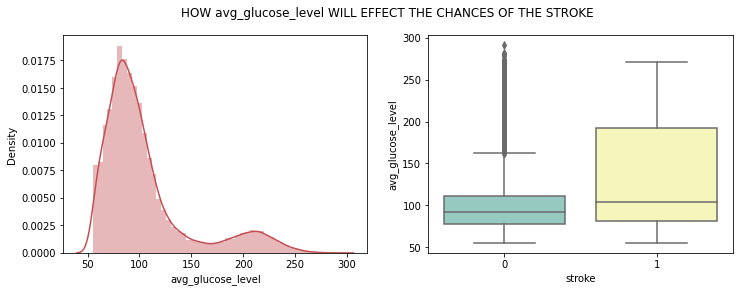

In [44]:
plt.figure(figsize = (12,4))
plt.suptitle('HOW avg_glucose_level WILL EFFECT THE CHANCES OF THE STROKE')
plt.subplot(1,2,1)
sns.distplot(hsd["avg_glucose_level"], color = 'r')
plt.subplot(1,2,2)
sns.boxplot(data = hsd, x = 'stroke', y = 'avg_glucose_level',palette="Set3" )
plt.show()

###### Observation:

From this above graph, we can see that people having stroke have an average glucose level of more than 100. There are some obvious outliers in patients who have no stroke but there are some chances of this being genuine records.

<h3 style = "color:BlueViolet"><left><i>Let’s see how does BMI affects the stroke rate.<i></left></h3>

In [45]:
hsd['bmi'].nunique()

555

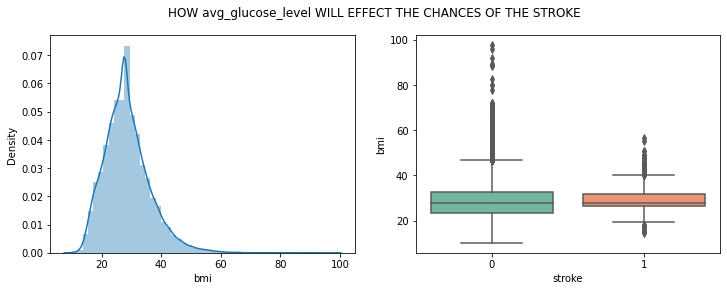

In [46]:
plt.figure(figsize = (12,4))
plt.suptitle('HOW avg_glucose_level WILL EFFECT THE CHANCES OF THE STROKE')
plt.subplot(1,2,1)
sns.distplot(hsd["bmi"])
plt.subplot(1,2,2)
sns.boxplot(data = hsd, x = 'stroke', y = 'bmi',palette="Set2" )
plt.show()

###### Observation:

There is as such no prominent observation of how does BMI affects the chances of having a stroke.

<h3 style = "color:BlueViolet"><left><i>Let’s see how does Smoking Status affects the stroke rate.<i></left></h3>

-  These attributes tell us whether or not the patient smokes. Smoking is injurious to health and may cause cardiac disease. Let’s see how it turns out in the case of our data.

In [47]:
print('Unique Values\n',hsd['smoking_status'].unique())
print('Value Counts\n',hsd['smoking_status'].value_counts())

Unique Values
 ['never smoked' 'formerly smoked' 'smokes']
Value Counts
 never smoked       29345
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64


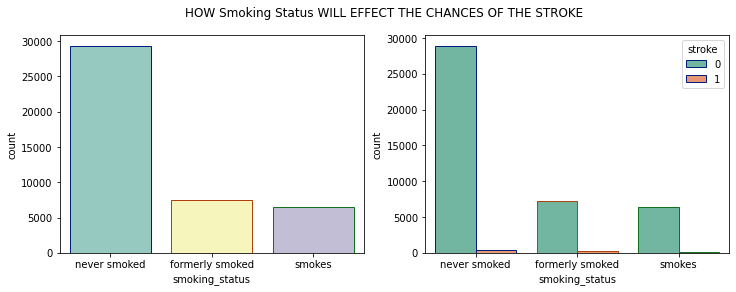

In [48]:
plt.figure(figsize = (12,4))
plt.suptitle('HOW Smoking Status WILL EFFECT THE CHANCES OF THE STROKE')
plt.subplot(1,2,1)
sns.countplot(data = hsd, x = "smoking_status",palette="Set3",edgecolor=sns.color_palette("dark",10) )
plt.subplot(1,2,2)
sns.countplot(data = hsd, x = 'smoking_status', hue = 'stroke',palette="Set2",edgecolor=sns.color_palette("dark", 10))
plt.show()

###### Observation:

As per these plots, we can see there is not much difference in the chances of stroke irrespective of smoking status.

<h3 style = "color:BlueViolet"><left><i>Feature Engineering<i></left></h3>

<h3 style = "color:BlueViolet"><left><i>OneHotEncoding of Categorical Data<i></left></h3>

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
ohe = OneHotEncoder(categories='auto', drop=None, sparse=False, dtype= 'float64')

In [51]:
hsd1 = hsd[['gender','ever_married','work_type','Residence_type','smoking_status']]

In [52]:
hsd2 = ohe.fit_transform(hsd1)

In [53]:
hsd2

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [54]:
c = ohe.get_feature_names() # Gives us column index names

In [55]:
c

array(['x0_Female', 'x0_Male', 'x0_Other', 'x1_No', 'x1_Yes',
       'x2_Govt_job', 'x2_Never_worked', 'x2_Private', 'x2_Self-employed',
       'x2_children', 'x3_Rural', 'x3_Urban', 'x4_formerly smoked',
       'x4_never smoked', 'x4_smokes'], dtype=object)

In [56]:
hsd3 = pd.DataFrame(hsd2, columns = c)

##### Merging OneHOtEncoded Dataframe with normal data Frame

In [57]:
ohe_df = pd.concat([hsd,hsd3], axis=1)

In [58]:
ohe_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,x2_Govt_job,x2_Never_worked,x2_Private,x2_Self-employed,x2_children,x3_Rural,x3_Urban,x4_formerly smoked,x4_never smoked,x4_smokes
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [59]:
# Removing parent columns after Onehotencoding

ohe_df = ohe_df.drop(ohe_df[['gender','ever_married','work_type','Residence_type','smoking_status']], axis=1)

In [60]:
ohe_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,x0_Female,x0_Male,x0_Other,x1_No,...,x2_Govt_job,x2_Never_worked,x2_Private,x2_Self-employed,x2_children,x3_Rural,x3_Urban,x4_formerly smoked,x4_never smoked,x4_smokes
0,3.0,0,0,95.12,18.0,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,58.0,1,0,87.96,39.2,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,8.0,0,0,110.89,17.6,0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,70.0,0,0,69.04,35.9,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,14.0,0,0,161.28,19.1,0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
43396,56.0,0,0,213.61,55.4,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43397,82.0,1,0,91.94,28.9,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43398,40.0,0,0,99.16,33.2,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<h3 style = "color:BlueViolet"><left><i>Outliers Handling<i></left></h3>
    
Checking for Outliers in Continuous Data

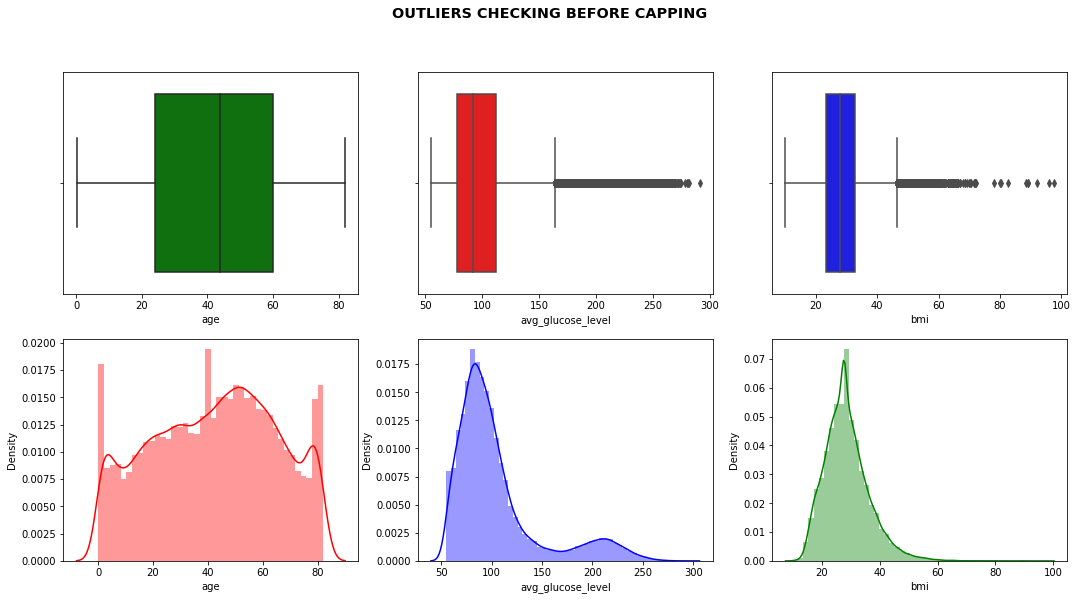

In [61]:
plt.figure(figsize = (18,9))
plt.suptitle("OUTLIERS CHECKING BEFORE CAPPING",fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(2,3,1)
sns.boxplot(ohe_df["age"],color = "green")
plt.subplot(2,3,4)
sns.distplot(ohe_df["age"],color = "red")
plt.subplot(2,3,2)
sns.boxplot(ohe_df["avg_glucose_level"], color = "red")
plt.subplot(2,3,5)
sns.distplot(ohe_df["avg_glucose_level"], color = "blue")
plt.subplot(2,3,3)
sns.boxplot(ohe_df["bmi"],color = "blue")
plt.subplot(2,3,6)
sns.distplot(ohe_df["bmi"], color = 'green')
plt.show()

- From the above Picture it is clear that we don't have outliers in feature "age" unlike features "avg_glucose_level" and "bmi"

<h3 style = "color:BlueViolet"><left><i>Outliers Capping Using Inter quartile Range Method<i></left></h3>

In [62]:
glucoseQ1 = ohe_df["avg_glucose_level"].quantile(0.25)

glucoseQ3 = ohe_df["avg_glucose_level"].quantile(0.75)

glucoseIQR = glucoseQ3 - glucoseQ1

In [63]:
glucose_upperlimit = glucoseQ3 + 1.5 * glucoseIQR

In [64]:
glucose_lowerlimit = glucoseQ1 - 1.5 * glucoseIQR

In [65]:
ohe_df["avg_glucose_level"] = np.where(ohe_df["avg_glucose_level"] > glucose_upperlimit, glucose_upperlimit,
                              np.where(ohe_df["avg_glucose_level"] < glucose_lowerlimit, glucose_lowerlimit,
                                       ohe_df["avg_glucose_level"]))

In [66]:
bmiQ1 = ohe_df["bmi"].quantile(0.25)

bmiQ3 = ohe_df["bmi"].quantile(0.75)

bmiIQR = bmiQ3 - bmiQ1

In [67]:
bmi_upperlimit = bmiQ3 + 1.5 * bmiIQR

In [68]:
bmi_lowerlimit = bmiQ1 - 1.5 * bmiIQR

In [69]:
ohe_df["bmi"] = np.where(ohe_df["bmi"] > bmi_upperlimit, bmi_upperlimit,
                np.where(ohe_df["bmi"] < bmi_lowerlimit, bmi_lowerlimit,
                                       ohe_df["bmi"]))

##### Outliers checkin after Capping

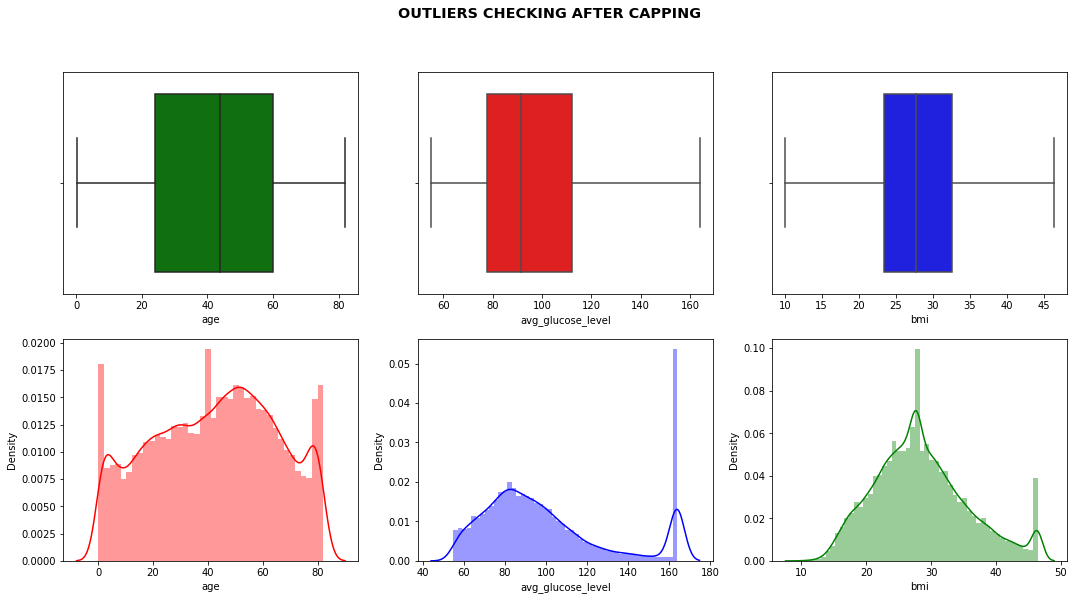

In [70]:
plt.figure(figsize = (18,9))
plt.suptitle("OUTLIERS CHECKING AFTER CAPPING",fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(2,3,1)
sns.boxplot(ohe_df["age"],color = "green")
plt.subplot(2,3,4)
sns.distplot(ohe_df["age"],color = "red")
plt.subplot(2,3,2)
sns.boxplot(ohe_df["avg_glucose_level"], color = "red")
plt.subplot(2,3,5)
sns.distplot(ohe_df["avg_glucose_level"], color = "blue")
plt.subplot(2,3,3)
sns.boxplot(ohe_df["bmi"],color = "blue")
plt.subplot(2,3,6)
sns.distplot(ohe_df["bmi"], color = 'green')
plt.show()

<h3 style = "color:BlueViolet"><left><i>Correlation of Features<i></left></h3>

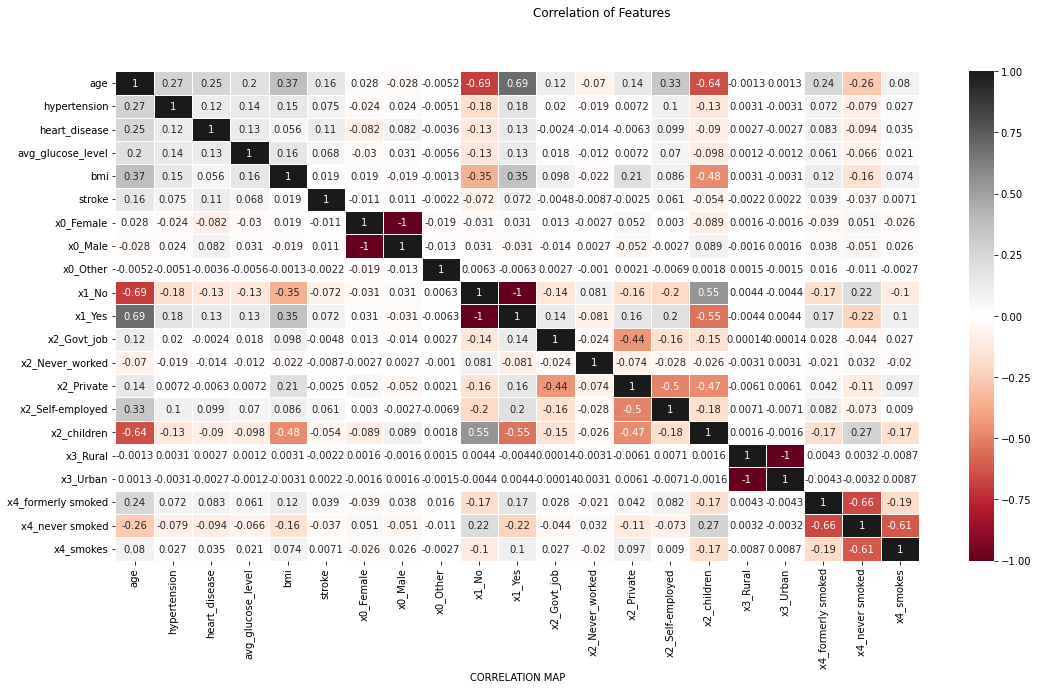

In [71]:
plt.figure(figsize = (18,9))
plt.suptitle("Correlation of Features")
corr = ohe_df.corr()
ax = sns.heatmap(corr, cmap='RdGy', annot=True, linewidths= 1.0)
ax.set_xlabel("CORRELATION MAP")
plt.show()

Observation:

Variables that are showing some effective correlation are:

age, hypertension, heart_disease, ever_married, avg_glucose_level.

<h3 style = "color:BlueViolet"><left><i>Feature Scalling<i></left></h3>

In [72]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [73]:
ohe_df["age"] = scale.fit_transform(np.array(ohe_df["age"]).reshape(-1,1))

In [74]:
ohe_df["avg_glucose_level"] = scale.fit_transform(np.array(ohe_df["avg_glucose_level"]).reshape(-1,1))

In [75]:
ohe_df["bmi"] = scale.fit_transform(np.array(ohe_df["bmi"]).reshape(-1,1))

In [76]:
ohe_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,x0_Female,x0_Male,x0_Other,x1_No,...,x2_Govt_job,x2_Never_worked,x2_Private,x2_Self-employed,x2_children,x3_Rural,x3_Urban,x4_formerly smoked,x4_never smoked,x4_smokes
0,0.035645,0,0,0.368530,0.217631,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.707031,1,0,0.302760,0.801653,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.096680,0,0,0.513388,0.206612,0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.853516,0,0,0.128967,0.710744,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.169922,0,0,0.976255,0.247934,0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0.121094,0,0,0.033436,0.283747,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
43396,0.682617,0,0,1.000000,1.000000,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43397,1.000000,1,0,0.339319,0.517906,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43398,0.487305,0,0,0.405640,0.636364,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<h3 style = "color:BlueViolet"><left><i>Let’s check our features using SelectKBest<i></left></h3>

Now we are using "SelectKBest class" function for extracting best features of given dataset. The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training. It helps us to eliminate less important part of the data and reduce a training time. 

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

###### Let's Check for f_classif Score

In [78]:
classifier1 = SelectKBest(score_func=f_classif,k=20) # K = Number of features to select

In [79]:
fitting = classifier1.fit(ohe_df.drop('stroke',axis=1),ohe_df['stroke'])

In [80]:
x = pd.DataFrame(fitting.scores_)

In [81]:
columns = pd.DataFrame(ohe_df.drop('stroke',axis=1).columns)

In [82]:
fscores = pd.concat([columns,x],axis=1)

In [83]:
fscores.columns = ['Attribute','Score']

In [84]:
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
0,age,1083.173455
2,heart_disease,569.021453
1,hypertension,247.686992
9,x1_Yes,225.639647
8,x1_No,225.639647
3,avg_glucose_level,199.781653
13,x2_Self-employed,163.131429
14,x2_children,127.461990
17,x4_formerly smoked,67.153698
18,x4_never smoked,59.984778


In the above result, we can see that age is a highly correlated variable and then it gets decreasing. 

###### Let's Check for chi2 score 

In [85]:
classifier2 = SelectKBest(score_func=chi2,k=20)

In [86]:
fitting1 = classifier2.fit(ohe_df.drop('stroke',axis=1),ohe_df['stroke'])

In [87]:
x1 = pd.DataFrame(fitting1.scores_)

In [88]:
columns1 = pd.DataFrame(ohe_df.drop('stroke',axis=1).columns)

In [89]:
chi_scores = pd.concat([columns1,x1],axis=1)

In [90]:
chi_scores.columns = ['Attribute','Score']

In [91]:
chi_scores.sort_values(by='Score',ascending=False)

,Attribute,Score
2,heart_disease,534.996642
1,hypertension,223.246768
0,age,155.260846
8,x1_No,144.506981
13,x2_Self-employed,137.089006
14,x2_children,109.067064
9,x1_Yes,79.975909
17,x4_formerly smoked,55.476344
3,avg_glucose_level,38.913251
18,x4_never smoked,19.400027


###### Let's Check for mutual_info_classif Score

In [92]:
classifier3 = SelectKBest(score_func= mutual_info_classif, k=20)

In [93]:
fitting2 = classifier3.fit(ohe_df.drop('stroke',axis=1),ohe_df['stroke'])

In [94]:
x2 = pd.DataFrame(fitting2.scores_)

In [95]:
columns2 = pd.DataFrame(ohe_df.drop('stroke',axis=1).columns)

In [96]:
mutua_info_score = pd.concat([columns2,x2],axis=1)

In [97]:
mutua_info_score.columns = ['Attribute','Score']

In [98]:
mutua_info_score.sort_values(by='Score',ascending=False)

,Attribute,Score
0,age,0.013932
9,x1_Yes,0.007239
18,x4_never smoked,0.005886
8,x1_No,0.004223
2,heart_disease,0.004168
4,bmi,0.003827
13,x2_Self-employed,0.003470
3,avg_glucose_level,0.003454
14,x2_children,0.003175
5,x0_Female,0.003117


- Here I am Considering f_classif scores and keeping the threshold score as 50. Resulting in the same features we got in the heatmap.

In [99]:
cols = fscores[fscores['Score']>50]['Attribute']
print(cols)

0                    age
1           hypertension
2          heart_disease
3      avg_glucose_level
8                  x1_No
9                 x1_Yes
13      x2_Self-employed
14           x2_children
17    x4_formerly smoked
18       x4_never smoked
Name: Attribute, dtype: object


<h3 style = "color:BlueViolet"><left><i>Splitting the Data<i></left></h3>

- Now, let’s split features into training and testing sets for training and testing our classification models.

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(ohe_df[cols],ohe_df['stroke'],random_state=0,test_size=0.30)

In [102]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30380, 10), (13020, 10), (30380,), (13020,))

<h3 style = "color:BlueViolet"><left><i>Balancing the Dataset<i></left></h3>

In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
smote = SMOTE()

In [105]:
x_train,y_train = smote.fit_resample(x_train,y_train)
x_test,y_test = smote.fit_resample(x_test,y_test)

In [106]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(59636, 10) (25598, 10) (59636,) (25598,)


<h3 style = "color:red"><center><i>Classification Machine Learning Models Building<i></centeer></h3>

<h3 style = "color:blue"><center><i>LogisticRegression<i></center></h3>

In [107]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver = 'lbfgs', random_state = 0)
model1.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [108]:
y_pred = model1.predict(x_test)

##### Calculating Confusion matrix and Other Scores

In [109]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)                     # Confusion Matrix
cm1.ravel()

array([ 9441,  3358,  2053, 10746], dtype=int64)

In [110]:
from sklearn.metrics import log_loss
logloss1 = log_loss(y_test, y_pred)                        # Log_loss Score

In [111]:
from sklearn.metrics import accuracy_score                 # Accuracy_Score

ac1 = accuracy_score(y_test, y_pred)

In [112]:
from sklearn import metrics                                # Precision_Score

precision_positive1 = metrics.precision_score(y_test, y_pred, pos_label = 1)

precision_negative1 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [113]:
recall_sensitivity1 = metrics.recall_score(y_test, y_pred, pos_label = 1)  # Recall_Score

recall_specificity1 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [114]:
f1_positive1 = metrics.f1_score(y_test, y_pred, pos_label = 1)            # f1_Score

f1_negative1 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [115]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model1.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

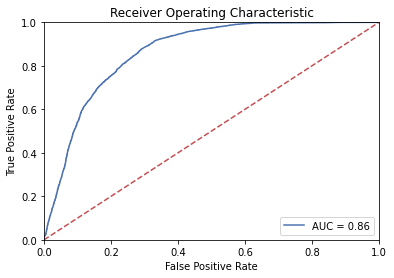

In [116]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
# auc Score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, preds)

auc_score1

0.8636880923552015

<h3 style = "color:blue"><center><i>KNeighborsClassifier<i></center></h3>

In [118]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 11)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

##### Calculating Confusion matrix and Other Scores

In [119]:
cm2 = confusion_matrix(y_test, y_pred)                     # Confusion Matrix
cm2.ravel()

array([10588,  2211,  5142,  7657], dtype=int64)

In [120]:
from sklearn.metrics import log_loss
logloss2 = log_loss(y_test, y_pred)                        # Log_loss Score

In [121]:
from sklearn.metrics import accuracy_score                 # Accuracy_Score

ac2 = accuracy_score(y_test, y_pred)

In [122]:
from sklearn import metrics                                # Precision_Score

precision_positive2 = metrics.precision_score(y_test, y_pred, pos_label = 1)

precision_negative2 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [123]:
recall_sensitivity2 = metrics.recall_score(y_test, y_pred, pos_label = 1)  # Recall_Score

recall_specificity2 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [124]:
f1_positive2 = metrics.f1_score(y_test, y_pred, pos_label = 1)            # f1_Score

f1_negative2 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [125]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model2.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

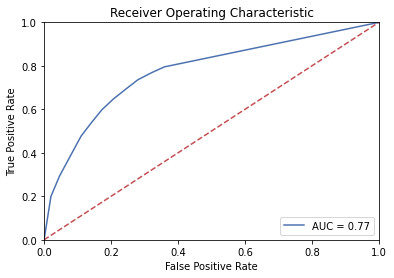

In [126]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [127]:
# auc Score

from sklearn.metrics import roc_auc_score

auc_score2 = roc_auc_score(y_test, preds)

auc_score2

0.7744145644435741

<h3 style = "color:blue"><center><i>Naive Bayes<i></center></h3>

In [128]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, y_train)

GaussianNB()

In [129]:
y_pred = model3.predict(x_test)

In [130]:
cm3 = confusion_matrix(y_test, y_pred)

In [131]:
cm3.ravel()

array([ 6515,  6284,  1076, 11723], dtype=int64)

In [132]:
from sklearn.metrics import log_loss
logloss3 = log_loss(y_test, y_pred)                        # Log_loss Score

In [133]:
from sklearn.metrics import accuracy_score                 # Accuracy_Score

ac3 = accuracy_score(y_test, y_pred)

In [134]:
from sklearn import metrics                                # Precision_Score

precision_positive3 = metrics.precision_score(y_test, y_pred, pos_label = 1)

precision_negative3 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [135]:
recall_sensitivity3 = metrics.recall_score(y_test, y_pred, pos_label = 1)  # Recall_Score

recall_specificity3 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [136]:
f1_positive3 = metrics.f1_score(y_test, y_pred, pos_label = 1)            # f1_Score

f1_negative3 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [137]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model3.predict_proba(x_test)

In [138]:
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

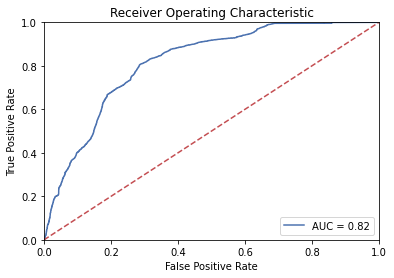

In [139]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [140]:
# auc Score

from sklearn.metrics import roc_auc_score

auc_score3 = roc_auc_score(y_test, preds)

auc_score3

0.8153040067582337

<h3 style = "color:blue"><center><i>Support Vector Machine(SVM)<i></center></h3>

In [141]:
from sklearn.svm import SVC
model4 = SVC(kernel = 'rbf', probability=True)

In [142]:
model4.fit(x_train, y_train)

SVC(probability=True)

In [143]:
y_pred = model4.predict(x_test)

In [144]:
cm4 = confusion_matrix(y_test, y_pred)

In [145]:
cm4.ravel()

array([ 9137,  3662,  1659, 11140], dtype=int64)

In [146]:
logloss4 = log_loss(y_test, y_pred)                        # Log_loss Score

In [147]:
ac4 = accuracy_score(y_test, y_pred)

In [148]:
precision_positive4 = metrics.precision_score(y_test, y_pred, pos_label = 1)

precision_negative4 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [149]:
recall_sensitivity4 = metrics.recall_score(y_test, y_pred, pos_label = 1)  # Recall_Score

recall_specificity4 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [150]:
f1_positive4 = metrics.f1_score(y_test, y_pred, pos_label = 1)            # f1_Score

f1_negative4 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [151]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model4.predict_proba(x_test)

In [152]:
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

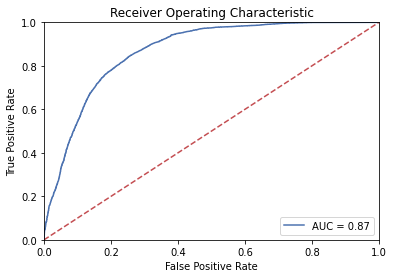

In [153]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [154]:
# auc Score

from sklearn.metrics import roc_auc_score

auc_score4 = roc_auc_score(y_test, preds)

auc_score4

0.8685930243703056

<h3 style = "color:blue"><center><i>Decision Tree<i></center></h3>

In [155]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(criterion = 'entropy')
model5.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [156]:
y_pred = model5.predict(x_test)

In [157]:
cm5 = confusion_matrix(y_test,y_pred)

In [158]:
logloss5 = log_loss(y_test, y_pred)                        # Log_loss Score

In [159]:
ac5 = accuracy_score(y_test, y_pred)

In [160]:
precision_positive5 = metrics.precision_score(y_test, y_pred, pos_label = 1)

precision_negative5 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [161]:
recall_sensitivity5 = metrics.recall_score(y_test, y_pred, pos_label = 1)  # Recall_Score

recall_specificity5 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [162]:
f1_positive5 = metrics.f1_score(y_test, y_pred, pos_label = 1)            # f1_Score

f1_negative5 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [163]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model5.predict_proba(x_test)

In [164]:
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

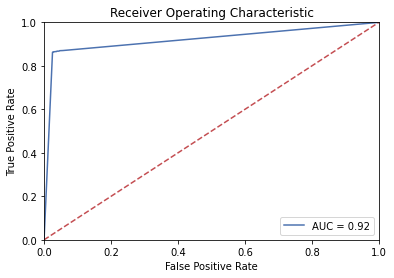

In [165]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [166]:
# auc Score

from sklearn.metrics import roc_auc_score

auc_score5 = roc_auc_score(y_test, preds)

auc_score5

0.9204107671827948

##### Decision Tree Graph

In [167]:
y = list(ohe_df['stroke'].unique())
x = list(ohe_df[cols].columns)

In [168]:
from sklearn.tree import export_text
r = export_text(model5, feature_names=x)
print(r)

|--- age <= 0.56
|   |--- age <= 0.43
|   |   |--- avg_glucose_level <= 0.29
|   |   |   |--- x2_children <= 0.99
|   |   |   |   |--- x2_children <= 0.01
|   |   |   |   |   |--- age <= 0.26
|   |   |   |   |   |   |--- age <= 0.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- age >  0.25
|   |   |   |   |   |   |   |--- avg_glucose_level <= 0.11
|   |   |   |   |   |   |   |   |--- avg_glucose_level <= 0.11
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- avg_glucose_level >  0.11
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- avg_glucose_level >  0.11
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  0.26
|   |   |   |   |   |   |--- x1_No <= 0.50
|   |   |   |   |   |   |   |--- x4_never smoked <= 0.50
|   |   |   |   |   |   |   |   |--- avg_glucose_level <= 0.19
|   |   |   |   |   |   |   |   |   |--- avg_glucose_level <= 0.19
|   |   |   |   |   |   |  

In [169]:
# If you want to save it to the file, it can be done with following code:

# with open("decistion_tree.log", "w") as fout:
     # fout.write(text_representation)


<h3 style = "color:blue"><center><i>Random Forest<i></center></h3>

In [170]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model6.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [171]:
y_pred = model6.predict(x_test)

In [172]:
cm6 = confusion_matrix(y_test,y_pred)

In [173]:
cm6.ravel()

array([12090,   709,  6057,  6742], dtype=int64)

In [174]:
logloss6 = log_loss(y_test, y_pred)                        # Log_loss Score

In [175]:
ac6 = accuracy_score(y_test, y_pred)

In [176]:
precision_positive6 = metrics.precision_score(y_test, y_pred, pos_label = 1)  # PRECISION 

precision_negative6 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [177]:
recall_sensitivity6 = metrics.recall_score(y_test, y_pred, pos_label = 1)  # Recall_Score

recall_specificity6 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [178]:
f1_positive6 = metrics.f1_score(y_test, y_pred, pos_label = 1)            # f1_Score

f1_negative6 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [179]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model6.predict_proba(x_test)

In [180]:
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

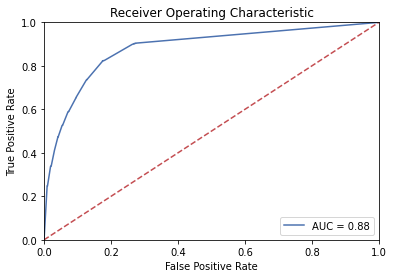

In [181]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [182]:
# auc Score

from sklearn.metrics import roc_auc_score

auc_score6 = roc_auc_score(y_test, preds)

auc_score6

0.8800313288695539

<h3 style = "color:blue"><center><i>XG_BOOST<i></center></h3>

In [183]:
from xgboost import XGBClassifier
model7 = XGBClassifier()

In [184]:
model7.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [185]:
y_pred = model7.predict(x_test)

In [186]:
cm7 = confusion_matrix(y_test,y_pred)

In [187]:
logloss7 = log_loss(y_test, y_pred)                        # Log_loss Score

In [188]:
ac7 = accuracy_score(y_test, y_pred)

In [189]:
precision_positive7 = metrics.precision_score(y_test, y_pred, pos_label = 1)  # PRECISION 

precision_negative7 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [190]:
recall_sensitivity7 = metrics.recall_score(y_test, y_pred, pos_label = 1)  # Recall_Score

recall_specificity7 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [191]:
f1_positive7 = metrics.f1_score(y_test, y_pred, pos_label = 1)            # f1_Score

f1_negative7 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [192]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model7.predict_proba(x_test)

In [193]:
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

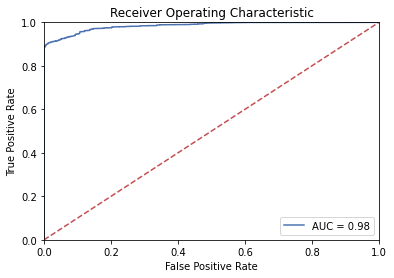

In [194]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [195]:
# auc Score

from sklearn.metrics import roc_auc_score

auc_score7 = roc_auc_score(y_test, preds)

auc_score7

0.9846962172757938

<h3 style = "color:blue"><center><i>Display of All Scores<i></center></h3>

In [196]:
data = {"Accuracy_Score":[ac1,ac2,ac3,ac4,ac5,ac6,ac7],
        "log_loss_Score":[logloss1,logloss2,logloss3,logloss4,logloss5,logloss6,logloss7],
        "F1_Score_Positive":[f1_positive1,f1_positive2,f1_positive3,f1_positive4,f1_positive5,f1_positive6,f1_positive7],
        "F1_Score_Nagative":[f1_negative1,f1_negative2,f1_negative3,f1_negative4,f1_negative5,f1_negative6,f1_negative7],
        "Precision_Positive":[precision_positive1,precision_positive2,precision_positive3,precision_positive4,precision_positive5,precision_positive6,precision_positive7],
        "Precision_Nagative":[precision_negative1,precision_negative2,precision_negative3,precision_negative4,precision_negative5,precision_negative6,precision_negative7],
        "Recall_sensitivity":[recall_sensitivity1,recall_sensitivity2,recall_sensitivity3,recall_sensitivity4,recall_sensitivity5,recall_sensitivity6,recall_sensitivity7],
        "Recall_specificity":[recall_specificity1,recall_specificity2,recall_specificity3,recall_specificity4,recall_specificity5,recall_specificity6,recall_specificity7],
        "AUC_Score":[auc_score1,auc_score2,auc_score3,auc_score4,auc_score5,auc_score6,auc_score7]}
All_scores = pd.DataFrame(data, index = ["LR","KNN","NB","SVM","DT","RF","XGB"])

In [197]:
All_scores

,Accuracy_Score,log_loss_Score,F1_Score_Positive,F1_Score_Nagative,Precision_Positive,Precision_Nagative,Recall_sensitivity,Recall_specificity,AUC_Score
LR,0.788616,7.301039,0.798870,0.777261,0.761912,0.821385,0.839597,0.737636,0.863688
KNN,0.712751,9.921298,0.675608,0.742262,0.775942,0.673109,0.598250,0.827252,0.774415
NB,0.712478,9.930870,0.761086,0.639039,0.651025,0.858253,0.915931,0.509024,0.815304
SVM,0.792132,7.179614,0.807217,0.774486,0.752601,0.846332,0.870380,0.713884,0.868593
DT,0.916947,2.868574,0.912388,0.921055,0.965379,0.877645,0.864911,0.968982,0.920411
RF,0.735682,9.129226,0.665877,0.781361,0.904845,0.666226,0.526760,0.944605,0.880031
XGB,0.944527,1.915981,0.942510,0.946407,0.978069,0.915383,0.909446,0.979608,0.984696


- Frome the above scores table it is clear that XG_Boost model showed best performance.

- Our next step is to perform Cross Validation of our models

<h3 style = "color:red"><center><i>CROSS VALIDATION OF MODELS<i></center></h3>

<h3 style = "color:blue"><left><i>Stratified-k-fold Cross-Validation approach<i></left></h3>

##### Stratified - k-fold Cross-Validation approach for Logistic Regression

In [198]:
from sklearn.model_selection import StratifiedKFold

In [199]:
skfold = StratifiedKFold(n_splits=5)

In [200]:
model1 = LogisticRegression(solver = 'lbfgs', random_state = 0)

In [201]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model1,ohe_df[cols],ohe_df['stroke'],cv=skfold)

##### Stratified - k-fold Cross-Validation approach for  KNN

In [202]:
model2 = KNeighborsClassifier(n_neighbors = 11)

In [203]:
scores2 = cross_val_score(model2,ohe_df[cols],ohe_df['stroke'],cv=skfold)

##### Stratified - k-fold Cross-Validation approach for  NB

In [204]:
model3 = GaussianNB()

In [205]:
scores3 = cross_val_score(model3,ohe_df[cols],ohe_df['stroke'],cv=skfold)

##### Stratified - k-fold Cross-Validation approach for  SVM

In [206]:
model4 = SVC(kernel = 'rbf', probability=True)

In [207]:
scores4 = cross_val_score(model5,ohe_df[cols],ohe_df['stroke'],cv=skfold)

##### Stratified - k-fold Cross-Validation approach for Decision Tree

In [208]:
model5 = DecisionTreeClassifier(criterion = 'entropy')

In [209]:
scores5 = cross_val_score(model5,ohe_df[cols],ohe_df['stroke'],cv=skfold)

##### Stratified - k-fold Cross-Validation approach for Random Forest

In [210]:
model6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

In [211]:
scores6 = cross_val_score(model6,ohe_df[cols],ohe_df['stroke'],cv=skfold)

##### Stratified - k-fold Cross-Validation approach for XG_Boost

In [212]:
model7 = XGBClassifier()

In [213]:
scores7 = cross_val_score(model7,ohe_df[cols],ohe_df['stroke'],cv=skfold)

<h3 style = "color:blue"><center><i>Display of Cross Validation Scores<i></center></h3>

In [214]:
data1 = {"Mean_CV_Scores":[np.mean(scores1),np.mean(scores2),np.mean(scores3),np.mean(scores4),np.mean(scores5),np.mean(scores6),np.mean(scores7)]}
Cross_Val_scores = pd.DataFrame(data1, index = ["LR","KNN","NB","SVM","DT","RF","XGB"])

In [215]:
Cross_Val_scores

,Mean_CV_Scores
LR,0.981959
KNN,0.981935
NB,0.740046
SVM,0.969516
DT,0.969839
RF,0.978018
XGB,0.981682


<h3 style = "color:DimGray"><left><i>Conclusion<i></left></h3>

- Among seven classification models XG_Boost gives the best performance.